In [1]:
!pip install yfinance;

# HMM for Stock
https://hmmlearn.readthedocs.io/en/0.2.0/auto_examples/plot_hmm_stock_analysis.html

In [2]:
import datetime

import numpy as np
from matplotlib import cm, pyplot as plt
from matplotlib.dates import YearLocator, MonthLocator
import yfinance as yf

In [3]:
INTC = yf.Ticker("INTC")
INTC.get_shares_full()


2021-10-23 00:00:00-04:00    4067000064
2021-10-26 00:00:00-04:00    4067000064
2021-11-05 00:00:00-04:00    4073469952
2021-11-06 00:00:00-04:00    4067000064
2021-11-11 00:00:00-05:00    4102249984
2021-11-11 00:00:00-05:00    4067000064
2021-11-18 00:00:00-05:00    4097769984
2021-11-18 00:00:00-05:00    4067000064
2021-11-20 00:00:00-05:00    4067000064
2021-11-20 00:00:00-05:00    4080140032
2021-12-02 00:00:00-05:00    4117210112
2021-12-03 00:00:00-05:00    4067000064
2021-12-04 00:00:00-05:00    4087640064
2021-12-04 00:00:00-05:00    4067000064
2022-01-26 00:00:00-05:00    4141959936
2022-01-27 00:00:00-05:00    4067000064
2022-01-28 00:00:00-05:00    4072000000
2022-02-04 00:00:00-05:00    4175739904
2022-02-05 00:00:00-05:00    4072000000
2022-02-11 00:00:00-05:00    4072000000
2022-03-04 00:00:00-05:00    4151859968
2022-03-05 00:00:00-05:00    4072000000
2022-03-15 00:00:00-04:00    4203150080
2022-03-17 00:00:00-04:00    4164689920
2022-03-18 00:00:00-04:00    4072000000


In [4]:
hist = INTC.history(start="1995-01-01", end="2012-01-06")
hist.to_csv("stockprices.csv")

In [5]:
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1995-01-03 00:00:00-05:00,2.291884,2.305955,2.269370,2.296387,41721600,0.0,0.0
1995-01-04 00:00:00-05:00,2.305393,2.318901,2.278377,2.291885,41865600,0.0,0.0
1995-01-05 00:00:00-05:00,2.296386,2.341414,2.291884,2.309895,60480000,0.0,0.0
1995-01-06 00:00:00-05:00,2.309896,2.345918,2.305393,2.341415,56316800,0.0,0.0
1995-01-09 00:00:00-05:00,2.336911,2.377435,2.336911,2.377435,75056000,0.0,0.0
...,...,...,...,...,...,...,...
2011-12-29 00:00:00-05:00,17.248907,17.404685,17.192260,17.383442,22319300,0.0,0.0
2011-12-30 00:00:00-05:00,17.298468,17.433004,17.171013,17.171013,21710100,0.0,0.0
2012-01-03 00:00:00-05:00,17.433007,17.624188,17.270146,17.376360,44845600,0.0,0.0


<AxesSubplot: xlabel='Date'>

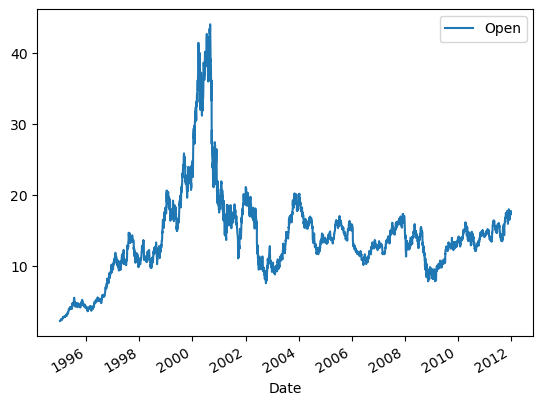

In [6]:
hist.reset_index().plot(x="Date", y="Open")

In [7]:
emissions = hist["Close"].to_numpy()

In [8]:
emissions = np.atleast_2d(emissions).T
emissions

array([[ 2.29638672],
       [ 2.29188514],
       [ 2.3098948 ],
       ...,
       [17.37635994],
       [17.77996063],
       [17.98530579]])

## Fit using Dynamax
https://probml.github.io/dynamax/api.html#dynamax.hidden_markov_model.DiagonalGaussianMixtureHMM

In [9]:
from dynamax.hidden_markov_model import DiagonalGaussianHMM

import jax.numpy as jnp
import jax.random as jr

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [10]:
true_num_states = 4
emission_dim = 1
hmm = DiagonalGaussianHMM(true_num_states, emission_dim)

In [11]:
key = jr.PRNGKey(0)
hmm = DiagonalGaussianHMM(4, emission_dim, transition_matrix_stickiness=10.)
params, props = hmm.initialize(key=key, method="kmeans", emissions=emissions)

/home/canyon/miniconda3/envs/ssm_book_club/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [12]:
params

ParamsDiagonalGaussianHMM(initial=ParamsStandardHMMInitialState(probs=Array([0.5464334 , 0.3061832 , 0.10259182, 0.04479165], dtype=float32)), transitions=ParamsStandardHMMTransitions(transition_matrix=Array([[0.823491  , 0.09372993, 0.05104779, 0.03173112],
       [0.01599798, 0.76646435, 0.1116748 , 0.1058628 ],
       [0.08503336, 0.09211437, 0.7288321 , 0.09402013],
       [0.15564974, 0.14060031, 0.02247819, 0.68127185]], dtype=float32)), emissions=ParamsDiagonalGaussianHMMEmissions(means=Array([[12.42191  ],
       [36.25472  ],
       [17.953318 ],
       [ 4.9940476]], dtype=float32), scale_diags=Array([[1.],
       [1.],
       [1.],
       [1.]], dtype=float32)))

In [13]:
params, lps = hmm.fit_em(params, props, emissions, num_iters=100)

In [16]:
params

ParamsDiagonalGaussianHMM(initial=ParamsStandardHMMInitialState(probs=Array([0.0714286 , 0.07142864, 0.0714286 , 0.78571445], dtype=float32)), transitions=ParamsStandardHMMTransitions(transition_matrix=Array([[9.9368626e-01, 5.2673800e-05, 6.2084226e-03, 5.2640731e-05],
       [2.5166754e-04, 9.9165016e-01, 7.8466106e-03, 2.5150055e-04],
       [6.8729199e-03, 1.9867204e-03, 9.9107671e-01, 6.3672283e-05],
       [2.4030961e-03, 2.1847118e-04, 2.1846363e-04, 9.9715996e-01]],      dtype=float32)), emissions=ParamsDiagonalGaussianHMMEmissions(means=Array([[11.6995   ],
       [28.845854 ],
       [16.20563  ],
       [ 4.4433246]], dtype=float32), scale_diags=Array([[1.5819882],
       [7.424529 ],
       [1.6225362],
       [1.0106862]], dtype=float32)))

In [18]:
most_likely_states = hmm.most_likely_states(params, emissions)
most_likely_states

Array([3, 3, 3, ..., 2, 2, 2], dtype=int32)

## Plots

In [24]:
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1995-01-03 00:00:00-05:00,2.291884,2.305955,2.269370,2.296387,41721600,0.0,0.0
1995-01-04 00:00:00-05:00,2.305393,2.318901,2.278377,2.291885,41865600,0.0,0.0
1995-01-05 00:00:00-05:00,2.296386,2.341414,2.291884,2.309895,60480000,0.0,0.0
1995-01-06 00:00:00-05:00,2.309896,2.345918,2.305393,2.341415,56316800,0.0,0.0
1995-01-09 00:00:00-05:00,2.336911,2.377435,2.336911,2.377435,75056000,0.0,0.0
...,...,...,...,...,...,...,...
2011-12-29 00:00:00-05:00,17.248907,17.404685,17.192260,17.383442,22319300,0.0,0.0
2011-12-30 00:00:00-05:00,17.298468,17.433004,17.171013,17.171013,21710100,0.0,0.0
2012-01-03 00:00:00-05:00,17.433007,17.624188,17.270146,17.376360,44845600,0.0,0.0


In [36]:
hist["Close"].iloc[mask]

Date
1995-01-03 00:00:00-05:00    2.296387
1995-01-03 00:00:00-05:00    2.296387
1995-01-03 00:00:00-05:00    2.296387
1995-01-03 00:00:00-05:00    2.296387
1995-01-03 00:00:00-05:00    2.296387
                               ...   
1995-01-03 00:00:00-05:00    2.296387
1995-01-03 00:00:00-05:00    2.296387
1995-01-03 00:00:00-05:00    2.296387
1995-01-03 00:00:00-05:00    2.296387
1995-01-03 00:00:00-05:00    2.296387
Name: Close, Length: 4285, dtype: float64

In [39]:
hist.index[mask]

DatetimeIndex(['1996-10-11 00:00:00-04:00', '1996-10-14 00:00:00-04:00',
               '1996-10-15 00:00:00-04:00', '1996-10-16 00:00:00-04:00',
               '1996-10-17 00:00:00-04:00', '1996-10-18 00:00:00-04:00',
               '1996-10-21 00:00:00-04:00', '1996-10-22 00:00:00-04:00',
               '1996-10-23 00:00:00-04:00', '1996-10-24 00:00:00-04:00',
               ...
               '2010-10-20 00:00:00-04:00', '2010-10-21 00:00:00-04:00',
               '2010-10-22 00:00:00-04:00', '2010-10-25 00:00:00-04:00',
               '2010-10-26 00:00:00-04:00', '2010-10-27 00:00:00-04:00',
               '2010-10-28 00:00:00-04:00', '2010-10-29 00:00:00-04:00',
               '2010-11-01 00:00:00-04:00', '2010-11-02 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=1885, freq=None)

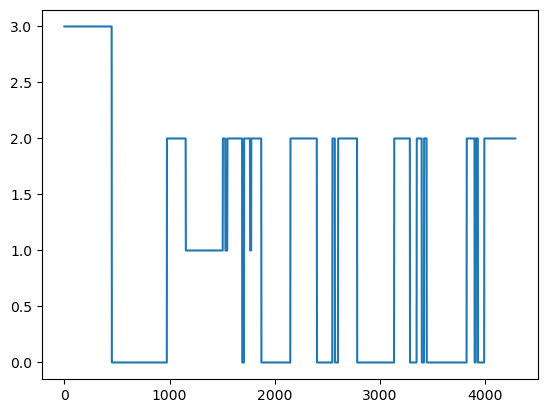

In [52]:
plt.plot(np.arange(most_likely_states.shape[0]), most_likely_states)

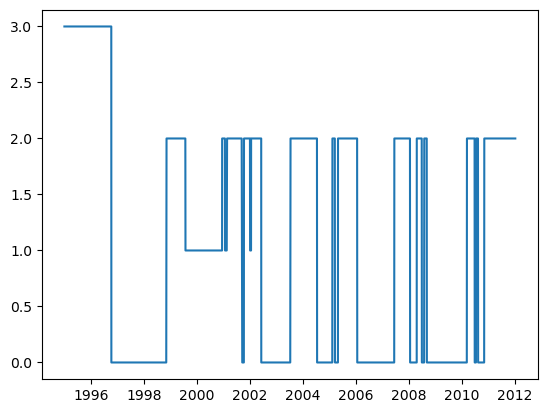

In [53]:
plt.plot(hist.index, most_likely_states)

In [55]:
mask = most_likely_states == 2
mask.sum()

Array(1568, dtype=int32)

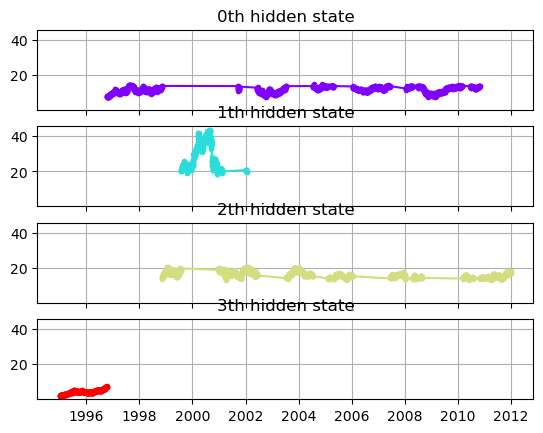

In [61]:

fig, axs = plt.subplots(4,1,sharex=True, sharey=True)
colours = cm.rainbow(np.linspace(0, 1, 4))

for i, (ax, colour) in enumerate(zip(axs, colours)):
    # Use fancy indexing to plot data in each state.
    mask = most_likely_states == i
    #ax.plot(hist.reset_index()["Date"].iloc[mask], hist["Close"].iloc[mask], ".-", c=colour)
    ax.plot(hist.index[mask], hist["Close"].to_numpy()[mask],  ".-", c=colour)
    ax.set_title("{0}th hidden state".format(i))

    # Format the ticks.

    ax.grid(True)